In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading the ratings csv file into dataframe
# Ignoring the timestamp,user_emb_id, movie_emb_id column

ratings = pd.read_csv('ratings.csv',usecols=['user_id', 'movie_id', 'rating'])
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB


In [5]:
ratings.isnull().sum()

user_id     0
movie_id    0
rating      0
dtype: int64

In [6]:
# Reading users file
users = pd.read_csv('users.csv', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])
users.head()

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,k-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id     6040 non-null int64
gender      6040 non-null object
zipcode     6040 non-null object
age_desc    6040 non-null object
occ_desc    6040 non-null object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB


In [8]:
# Reading movies file

movies =pd.read_csv('movies.csv', usecols=['movie_id', 'title', 'genres'])
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [10]:
movies.isnull().sum()

movie_id    0
title       0
genres      0
dtype: int64

In [11]:
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

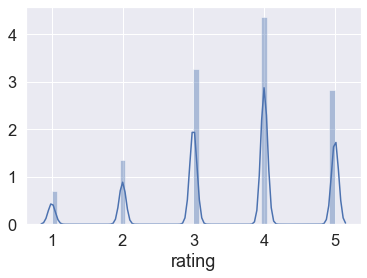

In [12]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [13]:
# Join all 3 files into one dataframe
dataset = pd.merge(pd.merge(movies,ratings),users)
# Display 20 movies with the highest ratings
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [14]:
# Make a census of genre keywords

genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
    
# Function that counts the no. of times each genre keyword appear

def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census:
        keyword_count[s]=0
    for census_keywords in dataset[ref_col].str.split('|'):
        if type(census_keywords) == float and pd.isnull(census_keywords):
            continue
        for s in [s for s in census_keywords if s in census]:
            if pd.notnull(s):
                keyword_count[s]+=1
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count
# Calling functions
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

In [15]:
# Break up the big genre string into a string array
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string values
movies['genres'] = movies['genres'].fillna("").astype('str')

In [16]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']"
1,2,Jumanji (1995),"['Adventure', ""Children's"", 'Fantasy']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama']"
4,5,Father of the Bride Part II (1995),['Comedy']


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1,2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

In [18]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

In [19]:
# Building an aray of movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [20]:
genre_recommendations('Father of the Bride Part II (1995)').head()

18                Ace Ventura: When Nature Calls (1995)
37                                  It Takes Two (1995)
51                              Mighty Aphrodite (1995)
62    Don't Be a Menace to South Central While Drink...
64                                      Bio-Dome (1996)
Name: title, dtype: object

In [21]:
genre_recommendations('Toy Story (1995)').head()

1050        Aladdin and the King of Thieves (1996)
2072                      American Tail, An (1986)
2073    American Tail: Fievel Goes West, An (1991)
2285                     Rugrats Movie, The (1998)
2286                          Bug's Life, A (1998)
Name: title, dtype: object

In [22]:
genre_recommendations('Sudden Death (1995)').head()

19                       Money Train (1995)
70                         Fair Game (1995)
143                         Bad Boys (1995)
202    Under Siege 2: Dark Territory (1995)
224                        Drop Zone (1994)
Name: title, dtype: object

In [23]:
genre_recommendations('Sabrina (1995)').head()

6                         Sabrina (1995)
38                       Clueless (1995)
63                  Two if by Sea (1996)
67    French Twist (Gazon maudit) (1995)
91            Vampire in Brooklyn (1995)
Name: title, dtype: object

In [24]:
# Fill NaN values in user_id and movie_id column 
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replacing NaN values in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

In [25]:
# Randomly sample 1% of the ratings dataset
small_data = ratings.sample(frac=0.02)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 263381 to 926263
Data columns (total 3 columns):
user_id     20004 non-null int64
movie_id    20004 non-null int64
rating      20004 non-null int64
dtypes: int64(3)
memory usage: 625.1 KB
None


In [26]:
from sklearn.model_selection import train_test_split 
train_data, test_data = train_test_split(small_data, test_size=0.2)

In [27]:
train_data.head()

,user_id,movie_id,rating
910676,5509,2371,2
14433,117,1722,4
172042,1088,2763,4
209150,1276,858,5
427272,2593,1036,5


In [28]:
test_data.head()

,user_id,movie_id,rating
763863,4543,249,4
240816,1450,1907,3
974941,5880,234,3
123181,795,360,2
826658,4964,590,3


In [29]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data.as_matrix(columns = ['user_id', 'movie_id', 'rating'])
test_data_matrix = test_data.as_matrix(columns = ['user_id', 'movie_id', 'rating'])

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(16003, 3)
(4001, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1- pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[ 1.         -0.02161463  0.31466438  0.96228044]
 [-0.02161463  1.          0.94217989  0.25119656]
 [ 0.31466438  0.94217989  1.          0.56103503]
 [ 0.96228044  0.25119656  0.56103503  1.        ]]


In [31]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.         -0.01839077  0.02642033]
 [-0.01839077  1.         -0.06428472]
 [ 0.02642033 -0.06428472  1.        ]]


In [32]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type=='user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:,np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff)/np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(pred,actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [34]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1425.2118463181553
Item-based CF RMSE: 1641.315383226706


In [36]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)/100))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)/100))

User-based CF RMSE: 6.956996506065958
Item-based CF RMSE: 1.6848002554435184
